In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Stats Basics - Describing One Variable

The first step on our statistical journey is to look at how we can describe one variable at a time. 

There are a few things that we can focus on here:
<ul>
<li> Loading data into Python. 
<li> Manipulating data structures containing data. 
<li> Basic statistics describing data. 
<li> Distributions and visualizations. 
</ul>

In short, we want to be able to load in a dataset, manipulate it to get what we care about, and look at the data (starting with one variable) to see what it says. This is a near universal starting point for doing machine learning, it all starts with the data, so gaining some understanding of that data will help us out. 

## Storing Data - Dataframes

We'll load the Titanic data from last time into a dataframe again. Dataframes are one of our most commonly used data structures (thing that stores a bunch of data in an organized way). We can think of a dataframe as a well formatted spreadsheet:
<ul>
<li> Each column represents one feature (variable) that is part of our data. 
<li> Each row represents one instance (example) of whatever we're looking at. 
<li> Each cell is one value. 
</ul>

In [2]:
# Load some data
df = pd.read_csv("../data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Slicing Dataframes

We can select different parts of a dataframe at a time. Most commonly, we want to get one or more of the columns. We can use the column names to get what we want. There are multiple ways to do this, but we will almost always settle on the last one. 

Suppose we want the column of "Survived" - 0 for Leo, 1 for Kate.

In [3]:
#This works, we'll usually avoid it because it is not quite as clear
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
#This also works, and is sometimes usefull if you're doing things like looping through data
#It is probably more confusing in most cases though, so we won't use it.
#Survived is the second column, and in programming we (almost) always start counting at 0. So we are getting column #1
df.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
#This is probably the most simple way, and this is what I'll try to use all the time
#Unless specified explicity, you can use whatever you want (in general, not just this)
#This will be the easiest to keep straight, I think
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Exercise

Challenge - print multiple columns. Such as Survived and Age! 

You may need to Google, think about what to Google and try to implement what you find. Try to Speculate why the formatting might be a little different here than for one variable. 

In [6]:
# Select Multiple Columns
df[["Survived", "Age"]]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,NaN
889,1,26.0


### Slicing by Rows

We can also select rows from a dataframe. This is generally less important for most of the things that we do. We can select the specific rows we want, or give a condition to filter by. This is effectively the same as using the filter feature in Excel. 

In [7]:
# Get the first 5 rows, like the head() command.
df[["Survived", "Age"]][0:5]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [8]:
# Get all the dead people
df[ df["Survived"] == 0 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


This can be used to select only the portion of data that we want in a given scenario. For example, if we only wanted Titanic survivors that are in the 18 to 34 age range (pretend we are trying to sell TV ads), we can select that. 

In [9]:
# First filter survive
df_surv = df[df["Survived"] == 1]

# Now do age, first the lower limit
df_surv = df_surv[df_surv["Age"] >= 18]
# Upper limit, and put the result in a well named variable
df_18_34 = df_surv[df_surv["Age"] <= 34]

df_18_34.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,135.000000,135.0,135.000000,135.000000,135.000000,135.000000,135.000000
mean,448.637037,1.0,2.037037,26.048148,0.385185,0.400000,41.502840
std,250.067502,0.0,0.832255,4.772384,0.690935,0.764902,54.572639
min,3.000000,1.0,1.000000,18.000000,0.000000,0.000000,0.000000
25%,257.000000,1.0,1.000000,22.000000,0.000000,0.000000,9.670850
50%,431.000000,1.0,2.000000,26.000000,0.000000,0.000000,21.000000
75%,651.000000,1.0,3.000000,30.000000,1.000000,0.000000,55.220850
max,890.000000,1.0,3.000000,34.000000,3.000000,3.000000,263.000000


## Types of Data

We have several different types of data that we may need to deal with. The most important split is the difference between categorical data and numerical data. This is one thing that we need to be very comfortable with:
<ul>
<li> Numerical Data - typically a measurement, reading, or value that is numerical. E.g. Net worth, age, temperature, belt size, etc...
    <ul>
    <li> Rule of thumb - if you can plot a value on a number line and "do math" to it - e.g. compare greater/lesser, add, divide - then it is probably numerical. 
    </ul>
<li> Categorical Data - typically a label, descriptor, or group indicator. E.g. hair color, land zoning, car make, type of tree, etc...
    <ul>
    <li> Rule of thumb - if you would "group by" a value, it is normally categorical. 
    </ul>
</ul>

Usually determining which data type our data falls into is relatively easy, but there are some scenarios where it isn't. Most notably, numbers are often used to denote group types, so they sometimes act as categorical values. For example, if we were to group people by their nationality and label those groups 1, 2, 3, etc... that is a use of a numerical variable as a categorical value. We will need to do things like this later on. 

#### Python Data Types

Every programming language has a few built in data types that it naturally supports. Some important and common ones are:
<ul>
<li> String - text. 
<li> Integer - number without decimals. 
<li> Float - number with decimals. 
<li> Bool - true/false.
</ul>

The "type()" function will show the type of any object. 

<b>Note:</b> Python is what we called a weakly typed language, which basically means that an individual varaible can take on any type of value (this is in comparison to a strongly typed language, where if you create an integer varaible, it can only be an integer). This has the advantage of making things easy to do, as there's no restrictions on what you can do with a variable; however, it can also lead to confusion as it makes it easier to make an error such as putting a text value in a varaible when you are expecting a number. Using clear variable names is the most simple way to protect against this. 

In [10]:
print(type("1.23"))
print(type(123))
print(type(1.23))
print(type(False))

<class 'str'>
<class 'int'>
<class 'float'>
<class 'bool'>


## Counts of Categorical Variables

When dealing with categorical variables the most important thing that we can know is how many times each value occurs. 

In [11]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
df["Pclass"].isnull().sum()

0

#### Countplots

We can also use a very simple visualization to see the counts broken down. Each tab holds the same countplot, the difference in the second one is that we added an argument for "hue", which is a common argument in seaborn graphs that separates the data by whatever you put there. Here we gave it the "Survived" variable, so each of the bars is split into survived/died subsets. 

::: {.panel-tabset group="python"}

## Countplot

<AxesSubplot:xlabel='Pclass', ylabel='count'>

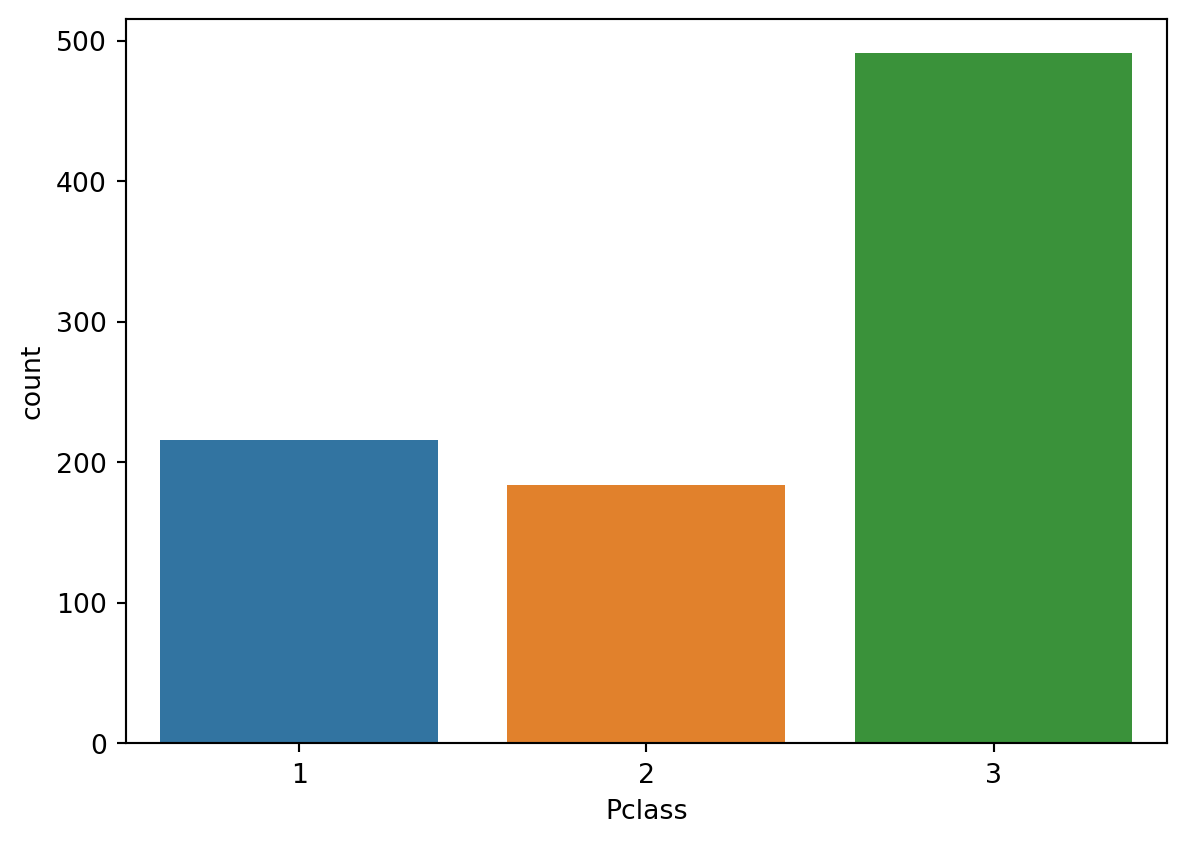

In [13]:
#| fig-cap: "A countplot"
sns.countplot(data=df, x="Pclass")

## Countplot - Split

<AxesSubplot:xlabel='Pclass', ylabel='count'>

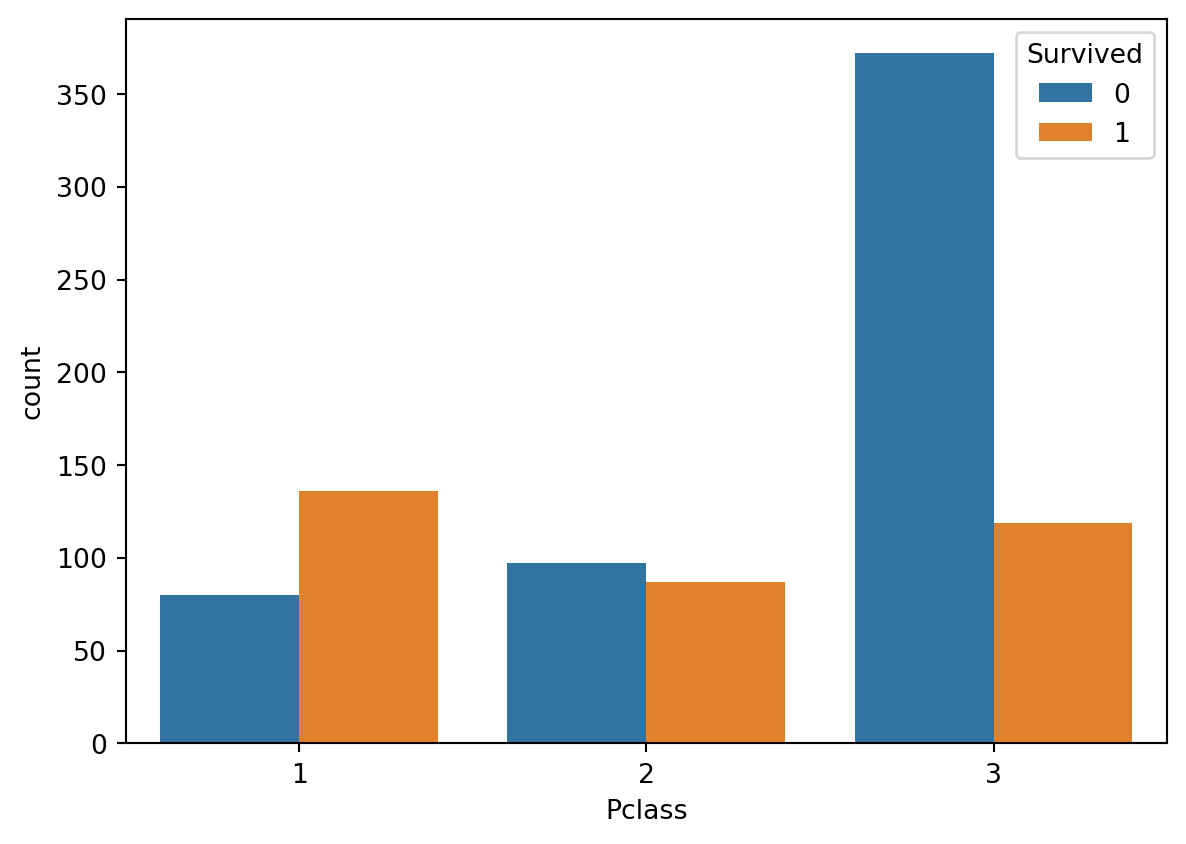

In [14]:
#| fig-cap: "A countplot"
sns.countplot(data=df, x="Pclass", hue="Survived")

:::

## Distribution of Numerical Variables

Probably the most critical thing we can know about a numerical variable is its distribution - or how many times different values occur. 

We can also get these statistics individually. This time I added print statements, this just makes the program print more than one output, if all the print statements are left our we'd only get the last one. 

This is one place where we can easily see multiple ways to do things, which is very common in programming. Specifically, we have several sets of functions that do basic math. Here we have an example of probably the two most common ones:
<ul>
<li> Pandas - the library that provides dataframes for us. 
<li> Numpy - this library has a bunch of useful math-y stuff. 
</ul>
Note the difference in how the code is structured for each one, this is due to <b><i>where</i></b> these functions come from. The pandas ones are called by stating DATFRAME.FUNCTION() - this is because the functions "are part of" pandas, so we can tell it to basically "find the mean function for this object (the df)" and the program will look inside of Pandas for that thing. This works because the dataframe has its own mean/std/count function built into it. The numpy ones are more generic, and we call them by saying LIBRARY.FUNCTION(DATA). This is because these are not part of the dataframe, we are calling a generic function and feeding it our data. We don't need a dataframe to use this, we can feed it (almost) any data - lists, arrays, series, etc... since it is not part of an object. This basic split is something that is pretty universal in most programming languages, it feels arbitrary at first but it does become natural over time. 

<b>Note:</b> the median below and the 50% above are the same. The median is the value "in the middle" - half of the values are higher, half lower. 

#### Examples of Basic Stats Functions. 

::: {.panel-tabset group="python"}

## Describe

In [15]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Pandas

In [16]:
print("Mean: ", df["Fare"].mean())
print("Median: ", df["Fare"].median())
print("Min: ", df["Fare"].min())
print("Max: ", df["Fare"].max())
print("Count: ", df["Fare"].count())
print("Variance: ", df["Fare"].var())
print("Std. Dev: ", df["Fare"].std())

Mean:  32.2042079685746
Median:  14.4542
Min:  0.0
Max:  512.3292
Count:  891
Variance:  2469.436845743117
Std. Dev:  49.693428597180905


## Numpy

In [17]:
print("Mean: ", np.mean(df["Fare"]))
print("Median: ", np.median(df["Fare"]))
print("Min: ", np.min(df["Fare"]))
print("Max: ", np.max(df["Fare"]))
print("Variance: ", np.var(df["Fare"]))
print("Std. Dev: ", np.std(df["Fare"]))

Mean:  32.2042079685746
Median:  14.4542
Min:  0.0
Max:  512.3292
Variance:  2466.6653116850434
Std. Dev:  49.66553444477411


::: 

## Distributions

When looking at a variable, calculating things like the mean or median is useful, but very incomplete. We probably want to know more about the values and how frequently they occur - something called the distribution. 

Distributions are one of the fundamental concepts of statistics, one that well use constantly. We'll dig into them a bunch more over the next few sessions. 

### Types of Distributions

Distributions commonly follow patterns, and we can use these paterns to help us build an understanding of our own data. 

We will look more at specific distributions in more detail soon, for now, we can think of distributions as describing the shape of the data, or how it is distributed over the range. 

#### Histograms

The histogram is the most common tool used to examine a distribution. A histogram is a specialized type of bar chart that is always structured in the same way:
<ul>
<li> The X axis is the variable we are looking at. 
<li> The Y axis is a count of how many times that value occurs. 
</ul>

Histograms will be one of our most frequently used visualizations - luckily they are pretty simple. 

#### Seaborn and Graphing

There are many, many packages that allow us to draw charts and visualizations in Python. The main one we'll focus on is called Seaborn. Seaborn is a package of graphing and charting tools that makes it relatively easy to make pretty charts. 

Seaborn is not the only choice, but it is common, pretty, and easy, so we'll stick with it for the most part. 

There are several types of graphs that we can look at to picture the distribution of our data. 

::: {.panel-tabset group="python"}

## Histogram

<AxesSubplot:xlabel='Age', ylabel='Count'>

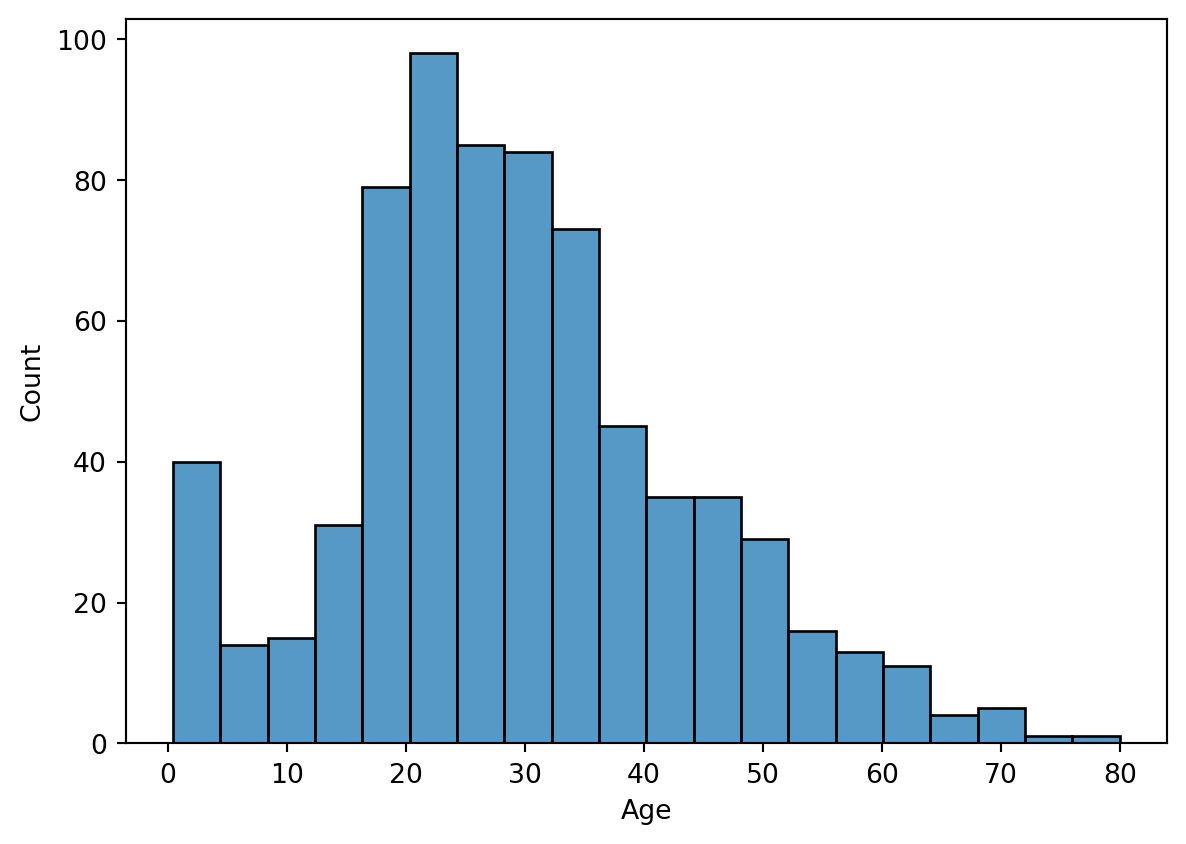

In [18]:
sns.histplot(df["Age"])

## PDF

<AxesSubplot:xlabel='Age', ylabel='Density'>

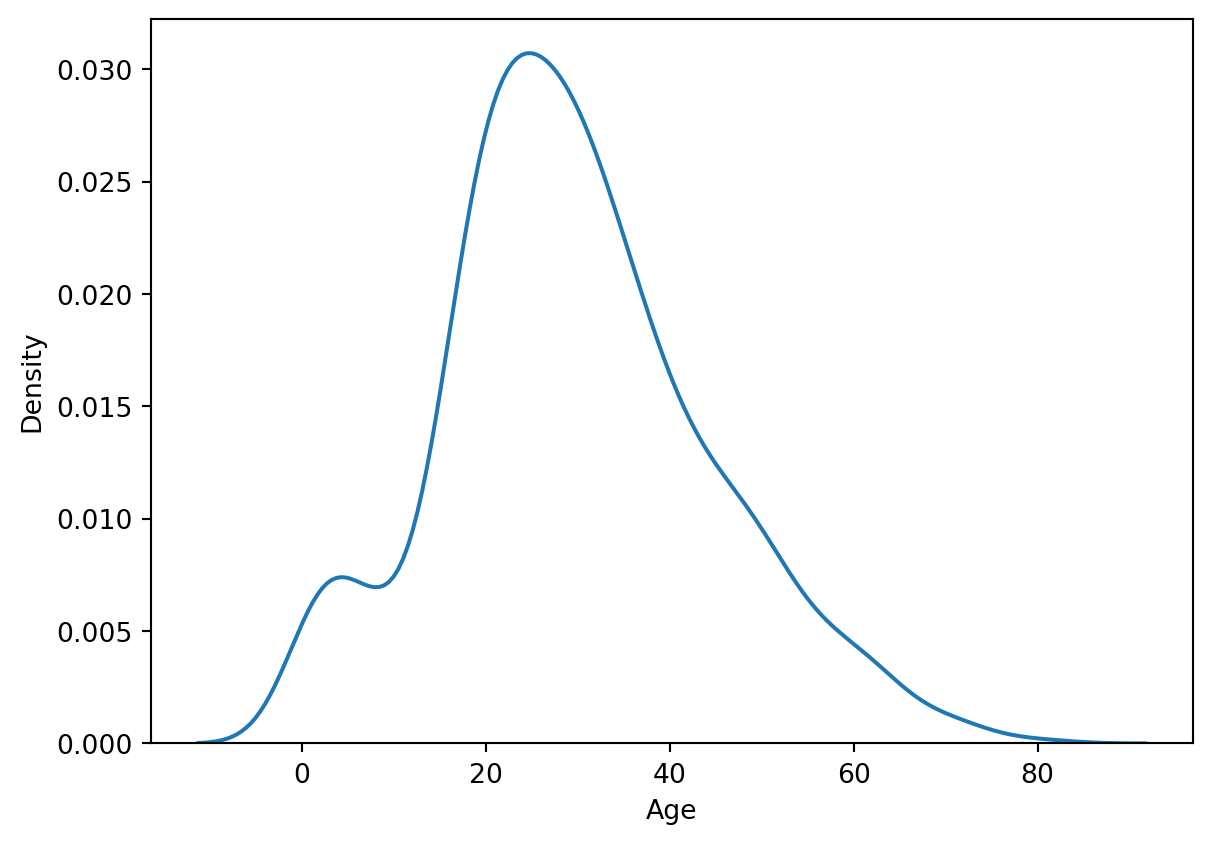

In [19]:
sns.kdeplot(df["Age"])

## CDF

<AxesSubplot:xlabel='Age', ylabel='Density'>

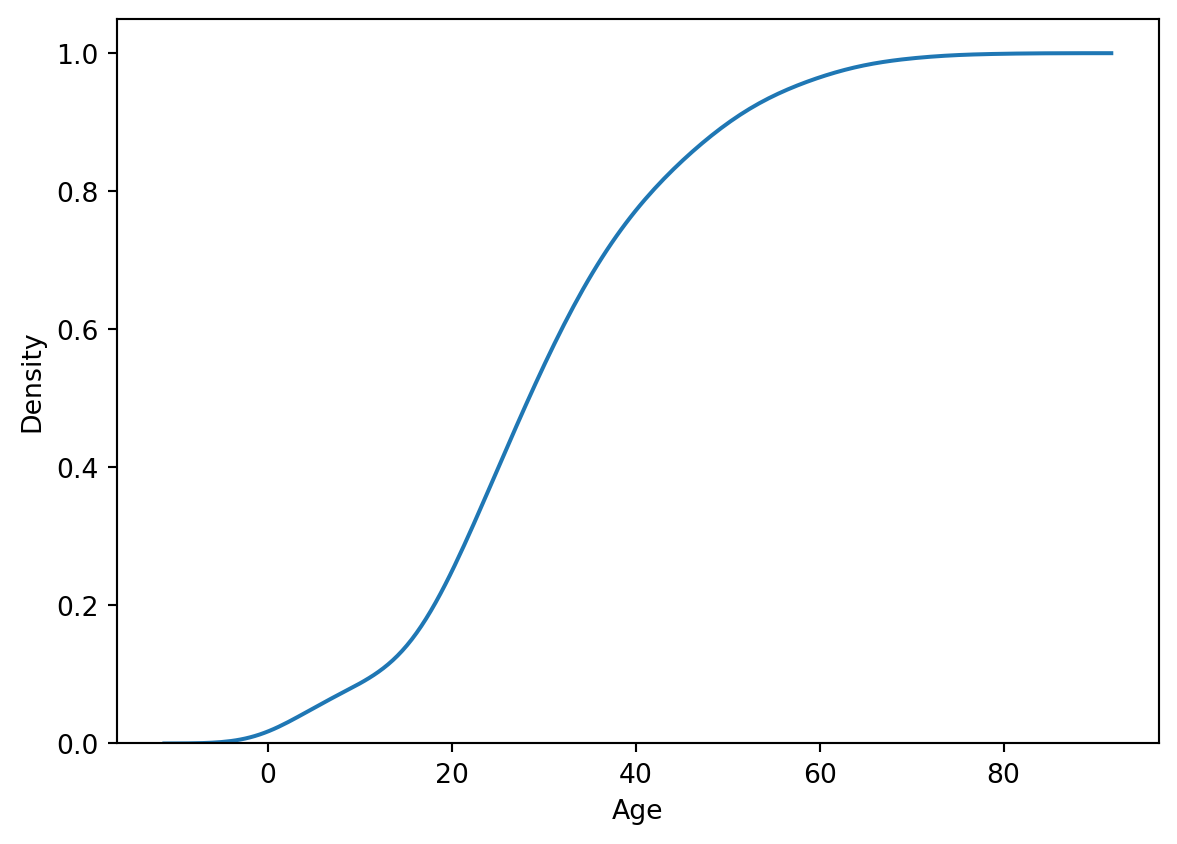

In [20]:
sns.kdeplot(df["Age"], cumulative=True)

## Hist w/ PDF

<AxesSubplot:xlabel='Age', ylabel='Count'>

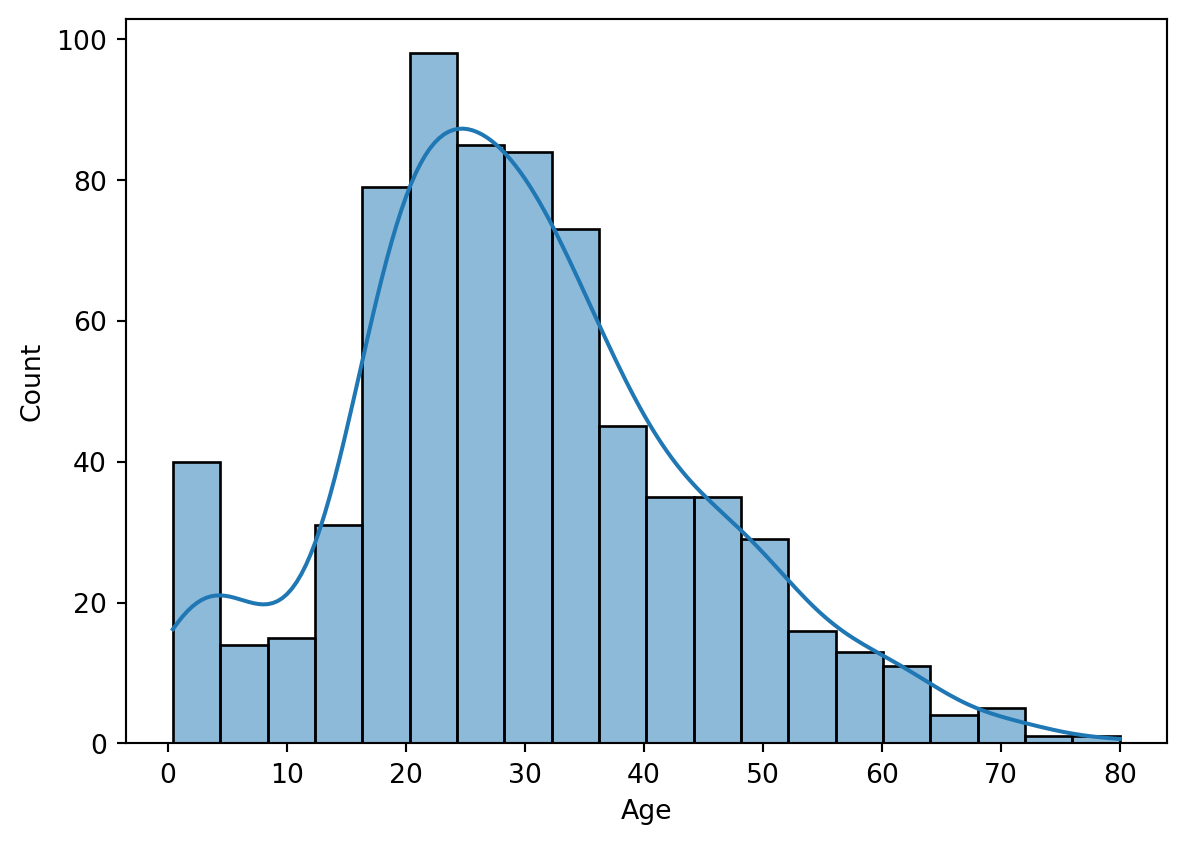

In [21]:
sns.histplot(df["Age"], kde=True)

::: 

### Seaborn, Matplotlib, and Graphing

We can do something similar with the underlying functionality of Seaborn - matplotlib and pyplot. Matplotlib is the "granddaddy" of graphing in Python, and the entire Seaborn package is built on top of it. The mpl stuff is generally less fancy looking and more confusing to use, but we do need to be at least a bit aware of it.

Why is this important?
<ul>
<li> Sometimes we need the "original" matplotlib stuff to do things, even when making Seaborn charts. 
<li> If we are looking for examples/explainations online, there is a high probability that we see some mpl stuff in that code. 
<li> One of the key things that makes programming a usefull thing is the ability to have functionality that is modular and can be extended (build better things on top of existing code). This is one of the first places where we start to deal with that. In the example below, we should be able to see that code for a histogram, read it, understand the goal, and replace it with a Seaborn histogram shoudl we desire. 
</ul>

<AxesSubplot:ylabel='Frequency'>

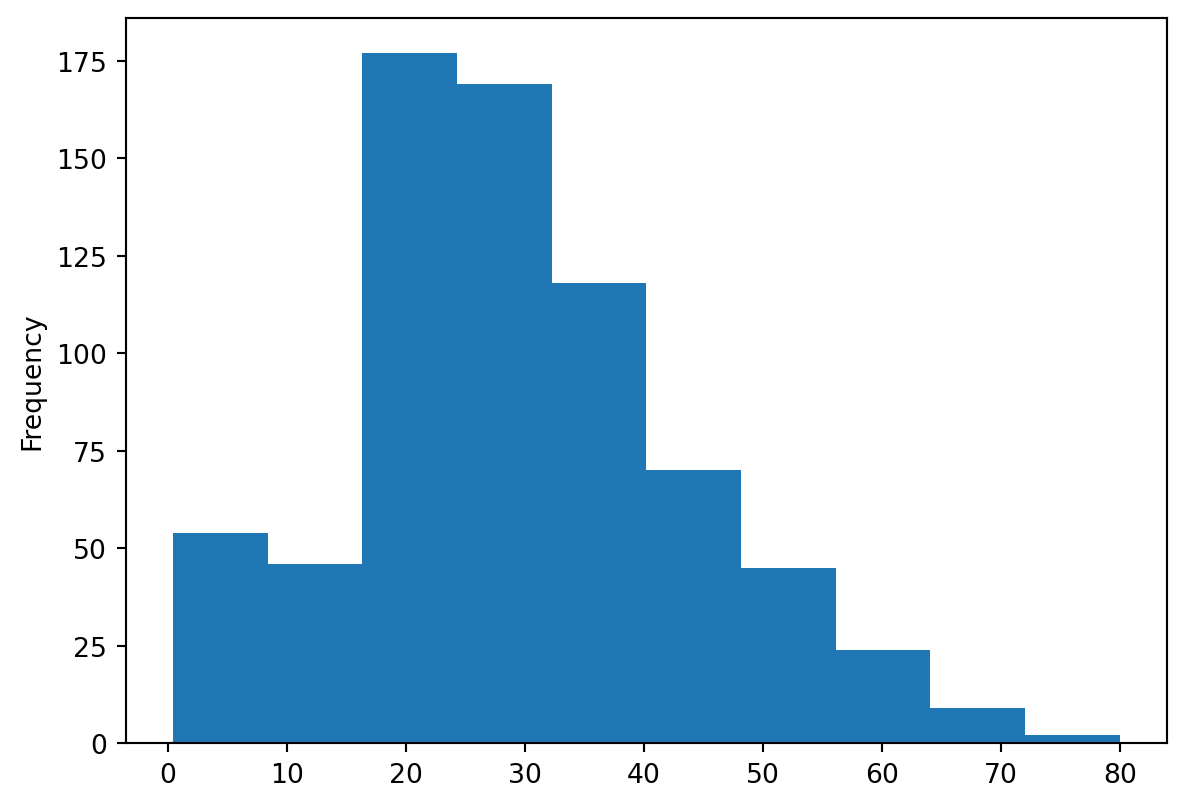

In [22]:
df["Age"].plot.hist()

## Outliers

Outliers are values that are "far outside the norm", or basically values that fall to the extreme left of extreme right of our distribution. 

### Dealing with Outliers

Dealing with outliers is always a matter of judgement - sometimes an outlier is real and relevant, so we want to keep it in; sometimes an outlier is an error or misleading, so we want to remove it. 

As a rule of thumb, we can think of what to do outliers like this:
<ul>
<li> If the outlier is going to help inform our model, and will help create more accurate predictions, we want to leave it in. 
<li> If the outlier is going to skew our results, and will make predictions less accurate, we want to remove it. 
</ul>
In practice, most outliers are filtered out. Knowing that Elon Musk has 300 billion dollars will rarely be helpful in building a model to predict the net worth of people. Usually this is the case, outliers are very rare, and don't really help in predicting a "normal" value. 

We have ways to automatically (-ish) remove outliers that we'll look at later on in the course. The most simple way to remove outliers is to just create a filter that removes every value that is greater or less than a cutoff. Our histograms can often give us a good idea of what that cutoff should be as we can see it visually on the graph. 

<AxesSubplot:xlabel='Fare', ylabel='Count'>

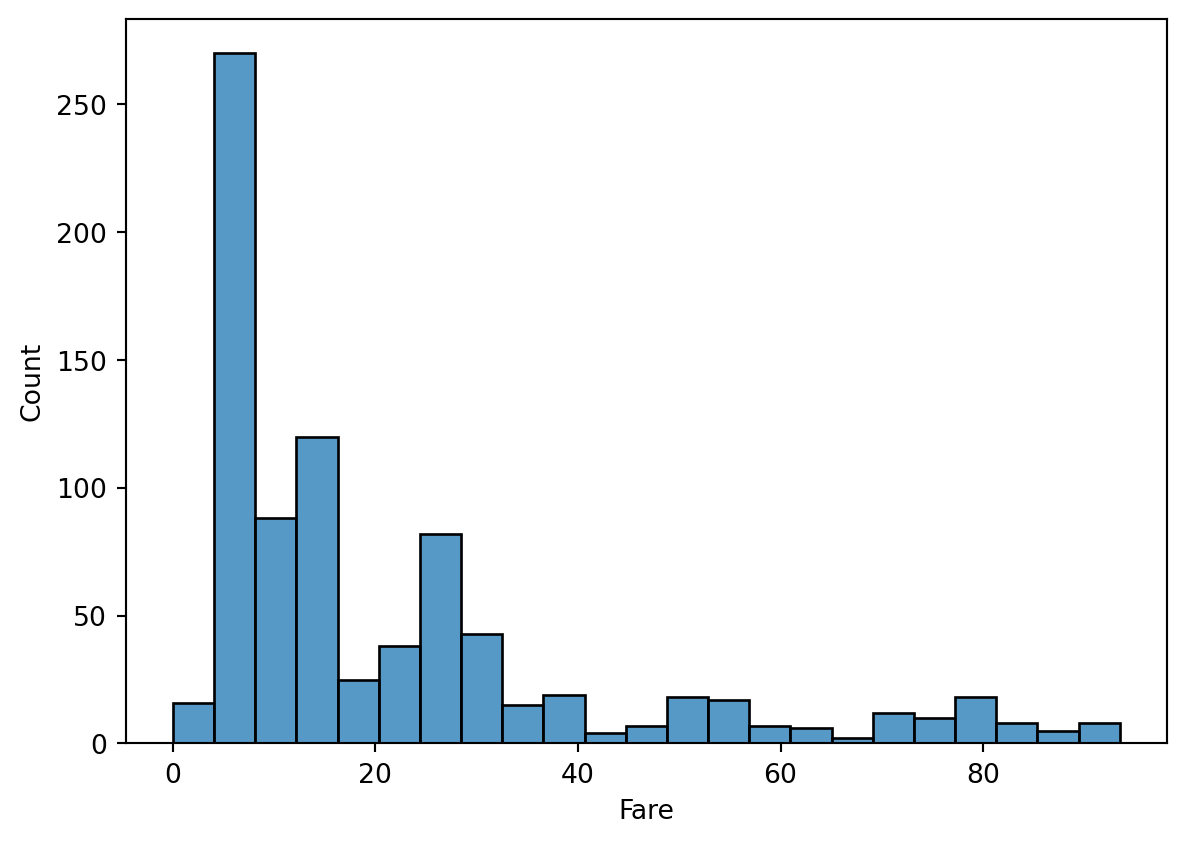

In [23]:
# Try a different value. 
# Add a filter to get rid of very large outliers. 

tmp_data = df[df["Fare"] < 100]
sns.histplot(data=tmp_data["Fare"])

## Where Are We Now?

At this point, we are hopefully becoming moderately comfortable with:
<ul>
<li> Opening, running, and editing notebook files. 
<li> Loading data into a dataframe and starting to manipulate it. 
<li> Starting to use calculations and visualizations to describe data. 
</ul>